In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

%load_ext autoreload
%autoreload 1
%aimport notebook_utils

sns.set_context('notebook')
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + '300K-tun-mol-seed-1-frac-train-1.0-performance.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

In [10]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,smoothing,upper_cutoff,rank
6,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,121,0.900000,0.289885,extra_dense_False,0.900000,0.218183,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_5,upper_cutoff_2.0,0
28,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,121,0.900000,0.286653,extra_dense_False,0.933333,0.226377,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_10,upper_cutoff_2.0,1
1,recurrent_unit_lstm__n_nodes_10__extra_dense_T...,96,0.866667,0.273666,extra_dense_True,0.933333,0.230736,lower_cutoff_1e-06,n_nodes_10,recurrent_unit_lstm,smoothing_2,upper_cutoff_2.0,2
9,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,115,0.833333,0.276228,extra_dense_False,0.900000,0.240618,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_2,upper_cutoff_2.0,3
20,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,59,0.866667,0.277275,extra_dense_True,0.900000,0.240896,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,smoothing_2,upper_cutoff_2.0,4


In [14]:
seeds = [1, 2, 3]
csv_basename = '300K-tun-mol-seed-{}-frac-train-1.0-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [17]:
df_combined.head()

,basename,extra_dense,lower_cutoff,upper_cutoff,n_nodes,network,smoothing,best_val_acc,best_val_loss,holdout_acc,holdout_loss,rank
10,recurrent_unit_lstm__n_nodes_10__extra_dense_T...,extra_dense_True,lower_cutoff_1e-06,upper_cutoff_2.0,n_nodes_10,recurrent_unit_lstm,smoothing_2,0.711111,0.460982,0.766667,0.428675,0
22,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,extra_dense_True,lower_cutoff_1e-06,upper_cutoff_2.0,n_nodes_6,recurrent_unit_lstm,smoothing_2,0.844444,0.409875,0.866667,0.434087,1
23,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,extra_dense_True,lower_cutoff_1e-06,upper_cutoff_2.0,n_nodes_6,recurrent_unit_lstm,smoothing_5,0.755556,0.440549,0.744444,0.443309,2
32,recurrent_unit_lstm__n_nodes_8__extra_dense_Tr...,extra_dense_True,lower_cutoff_1e-06,upper_cutoff_0.1,n_nodes_8,recurrent_unit_lstm,smoothing_5,0.755556,0.481516,0.733333,0.460413,3
0,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,extra_dense_False,lower_cutoff_1e-06,upper_cutoff_0.1,n_nodes_10,recurrent_unit_lstm,smoothing_10,0.722222,0.514312,0.733333,0.466015,4


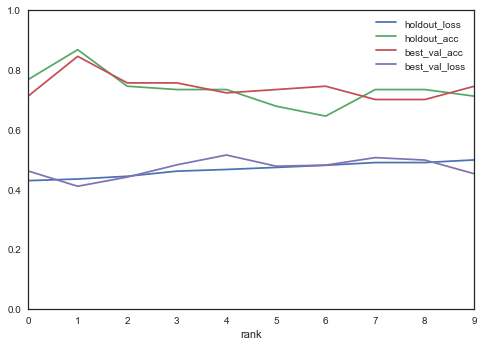

In [19]:
notebook_utils.plot_ranked_performance(df_combined, top=10)

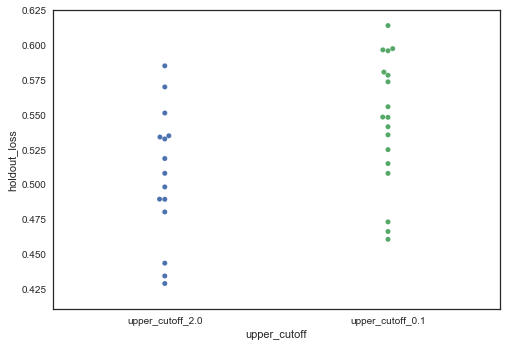

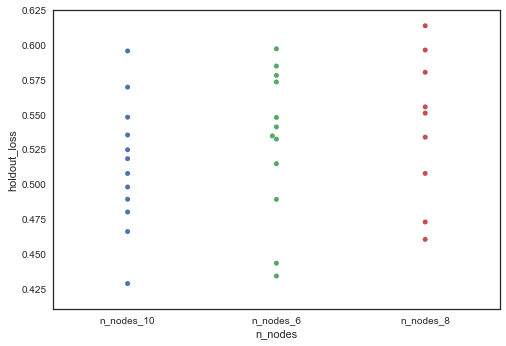

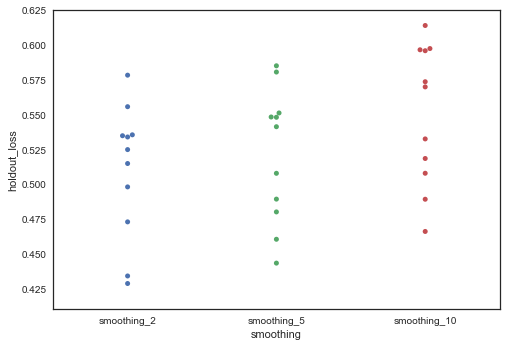

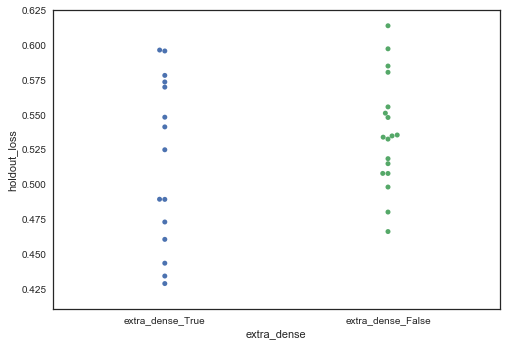

In [23]:
for x in ['upper_cutoff', 'n_nodes', 'smoothing', 'extra_dense']:
    sns.swarmplot(data=df_combined, y='holdout_loss', x=x)
    plt.show()